<a href="https://colab.research.google.com/github/Raphaeldavid203/University-Projects/blob/main/CW2_BENG0019_FULL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **QUESTION 1**


1. The following table gives data on weekly family consumption expenditure (Y, in £) and weekly family income (X, in £).

Plot these data in a scatter plot with income on the horizontal axis and consumption expenditure on the vertical axis.

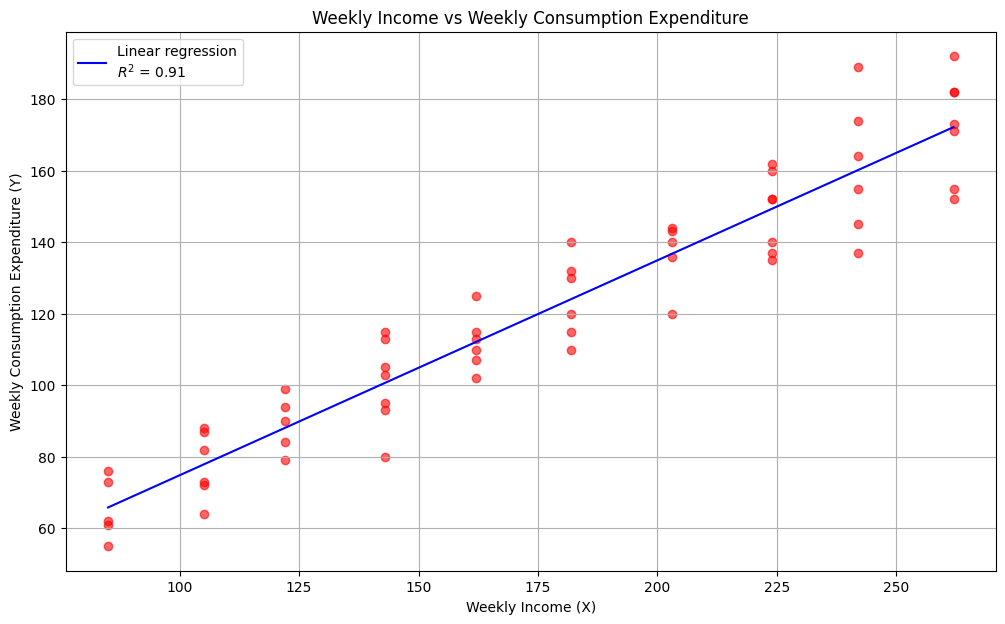

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

data = {
    'Weekly_income_X': [85, 105, 122, 143, 162, 182, 203, 224, 242, 262],
    'Weekly_consumption_expenditure_Y': [
        [55, 62, 61, 73, 76],
        [64, 72, 73, 82, 87, 88],
        [79, 84, 90, 94, 99],
        [80, 93, 95, 103, 105, 113, 115],
        [102, 107, 110, 115, 113, 125],
        [110, 115, 120, 130, 132, 140],
        [120, 136, 140, 144, 143],
        [135, 137, 140, 152, 152, 160, 162],
        [137, 145, 155, 164, 174, 189],
        [152, 155, 173, 171, 182, 182, 192]
    ]
}

df = pd.DataFrame(data)


plot_data = {
    'Income': [],
    'Expenditure': []
}

for income, expenditures in zip(df['Weekly_income_X'], df['Weekly_consumption_expenditure_Y']):
    for expenditure in expenditures:
        plot_data['Income'].append(income)
        plot_data['Expenditure'].append(expenditure)

plot_df = pd.DataFrame(plot_data)

slope, intercept, r_value, p_value, std_err = stats.linregress(plot_df['Income'], plot_df['Expenditure'])

line = slope * plot_df['Income'] + intercept

plt.figure(figsize=(12, 7))
plt.scatter(plot_df['Income'], plot_df['Expenditure'], color='red', alpha=0.6)
plt.plot(plot_df['Income'], line, color='blue', label=f'Linear regression\n$R^2$ = {r_value**2:.2f}')
plt.title('Weekly Income vs Weekly Consumption Expenditure')
plt.xlabel('Weekly Income (X)')
plt.ylabel('Weekly Consumption Expenditure (Y)')
plt.legend()
plt.grid(True)
plt.show()


### **QUESTION 7**

a/ Show using MOLS (and an appropriate software package, or you may write code yourselves using any programming language of your choice) that the data above gives rise to the following model (the terms in the second row are the standard errors), calculate all the standard errors and t-values.



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.DataFrame({
    'Year': np.arange(1958, 1973),
    'Y': [16607.7, 17511.3, 20171.2, 20932.9, 20406.0, 20831.6, 24806.3,
          26465.8, 27403.0, 28628.7, 29904.5, 27508.2, 29035.5, 29281.5, 31535.8],
    'X2': [275.5, 274.4, 269.7, 267.0, 267.8, 275.0, 283.0, 300.7, 307.5,
           303.7, 304.7, 298.6, 295.5, 299.0, 288.1],
    'X3': [17803.7, 18096.8, 18271.8, 19167.3, 19647.6, 20803.5, 22076.6,
           23445.2, 24939.0, 26713.7, 29957.8, 31585.9, 33474.5, 34821.8, 41794.3]
})
data['ln_Y'] = np.log(data['Y'])
data['ln_X2'] = np.log(data['X2'])
data['ln_X3'] = np.log(data['X3'])


X = sm.add_constant(data[['ln_X2', 'ln_X3']])
model = sm.OLS(data['ln_Y'], X).fit()

# To be even more precise, we have directly extracted the values we wish to study in addition to the OLS Regression Results.
params = model.params
t_values = model.tvalues
standard_errors = model.bse

confidence_interval = model.conf_int(alpha=0.05)

p_values = model.pvalues

print("Regression Results:")
print("------------------------------------------------")
print(f"Parameters:\n{params}\n")
print(f"T-values:\n{t_values}\n")
print(f"Standard Errors:\n{standard_errors}\n")
print(f"95% Confidence Intervals:\n{confidence_interval}\n")
print(f"P-values:\n{p_values}\n")
print("Model Summary:")
print(model.summary())

Regression Results:
------------------------------------------------
Parameters:
const   -3.338455
ln_X2    1.498767
ln_X3    0.489858
dtype: float64

T-values:
const   -1.362908
ln_X2    2.776509
ln_X3    4.800487
dtype: float64

Standard Errors:
const    2.449508
ln_X2    0.539803
ln_X3    0.102043
dtype: float64

95% Confidence Intervals:
              0         1
const -8.675475  1.998565
ln_X2  0.322638  2.674896
ln_X3  0.267525  0.712192

P-values:
const    0.197939
ln_X2    0.016758
ln_X3    0.000433
dtype: float64

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   ln_Y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     48.07
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.87e-06
Time:                        09:56:55   Log-Likelihood:      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


b) Perform zero null hypotheses for each of the three parameters in the above model using 𝛼 = 5% and clearly state your deductions as well as the alternate hypotheses.

Here, we chose to use Python. In addition, we performed two approaches, the P-value approach and the t-Statistic approach, to see if the two methods gave the same result and thus strengthen our answer.

### **P-value approach:**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = data[['ln_X2', 'ln_X3']]
X = sm.add_constant(X)
Y = data['ln_Y']

model = sm.OLS(Y, X).fit()

alpha = 0.05

p_values = model.pvalues

hypothesis_tests = pd.DataFrame({
    'Term': model.params.index,
    'Estimated Coefficient': model.params.values,
    'P-value': p_values.values,
    'Reject H0': p_values < alpha
})
# Here we define the hypotheses H0 and H1
hypothesis_text = {
    'const': {
        'H0': "β0 = 0 (The intercept has no effect on production.)",
        'H1': "β0 ≠ 0 (The intercept has an effect on production.)"
    },
    'ln_X2': {
        'H0': "β1 = 0 (Labour has no effect on production.)",
        'H1': "β1 ≠ 0 (Labour has an effect on production.)"
    },
    'ln_X3': {
        'H0': "β2 = 0 (Capital has no effect on production.)",
        'H1': "β2 ≠ 0 (Capital has an effect on production.)"
    }
}

hypothesis_results = {}
for term in hypothesis_tests['Term']:
    hypothesis_results[term] = {
        'H0': hypothesis_text[term]['H0'],
        'H1': hypothesis_text[term]['H1'],
        'P-value': float(hypothesis_tests[hypothesis_tests['Term'] == term]['P-value']),
        'Reject H0': bool(hypothesis_tests[hypothesis_tests['Term'] == term]['Reject H0'].values[0])
    }

for term, details in hypothesis_results.items():
    print(f"Term: {term}")
    print(f"  Null Hypothesis (H0): {details['H0']}")
    print(f"  Alternative Hypothesis (H1): {details['H1']}")
    print(f"  P-value: {details['P-value']}")
    print(f"  Reject H0: {'Yes' if details['Reject H0'] else 'No'}\n")


Term: const
  Null Hypothesis (H0): β0 = 0 (The intercept has no effect on production.)
  Alternative Hypothesis (H1): β0 ≠ 0 (The intercept has an effect on production.)
  P-value: 0.1979394664540821
  Reject H0: No

Term: ln_X2
  Null Hypothesis (H0): β1 = 0 (Labour has no effect on production.)
  Alternative Hypothesis (H1): β1 ≠ 0 (Labour has an effect on production.)
  P-value: 0.0167584827552753
  Reject H0: Yes

Term: ln_X3
  Null Hypothesis (H0): β2 = 0 (Capital has no effect on production.)
  Alternative Hypothesis (H1): β2 ≠ 0 (Capital has an effect on production.)
  P-value: 0.0004331776211479015
  Reject H0: Yes



### **t-Statistic approach**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

model = sm.OLS(Y, X).fit()

# Here We calculate the critical t-value for a two-tailed test at alpha=5% we can also find it on a T statistics table.
t_crit = stats.t.ppf(1 - alpha/2, df=model.df_resid)

# Here We compare the t-statistic for each coefficient to the critical t-value calculated.
for param, t_value in zip(model.params.index, model.tvalues):
    reject_h0 = abs(t_value) > t_crit
    print(f"{param}:")
    print(f"  t-Statistic: {t_value}")
    print(f"  Critical t-Value: {t_crit}")
    print(f"  Reject H0: {'Yes' if reject_h0 else 'No'}\n")


const:
  t-Statistic: -1.3629084393892403
  Critical t-Value: 2.1788128296634177
  Reject H0: No

ln_X2:
  t-Statistic: 2.776509385242595
  Critical t-Value: 2.1788128296634177
  Reject H0: Yes

ln_X3:
  t-Statistic: 4.800486844628093
  Critical t-Value: 2.1788128296634177
  Reject H0: Yes



c) Determine 95% confidence intervals for the parameters of the model and confirm your deductions for part (b) above. [4 marks]


We took the initiative of creating a new python code to extract only the intervals in an array so that our results would be easy to read, but we could have used our code from question 7) a). In addition, values are more detailed, without rounding.

In [ ]:
X = sm.add_constant(data[['ln_X2', 'ln_X3']])
Y = data['ln_Y']
results = sm.OLS(Y, X).fit()

confidence_intervals = results.conf_int(alpha=0.05)
confidence_intervals.columns = ['Lower Bound', 'Upper Bound']

confidence_intervals['Estimated Coefficient'] = results.params

confidence_intervals['P-value'] = results.pvalues

confidence_intervals['Contains Zero'] = (confidence_intervals['Lower Bound'] <= 0) & \
                                        (confidence_intervals['Upper Bound'] >= 0)

confidence_intervals = confidence_intervals.rename(index={'const': 'Intercept', 'ln_X2': 'Labour', 'ln_X3': 'Capital'})

confidence_intervals.reset_index(inplace=True)
confidence_intervals.rename(columns={'index': 'Parameter'}, inplace=True)

print("Confidence Intervals and Hypothesis Testing Results:")
print(confidence_intervals.to_string(index=False))


Confidence Intervals and Hypothesis Testing Results:
Parameter  Lower Bound  Upper Bound  Estimated Coefficient  P-value  Contains Zero
Intercept    -8.675475     1.998565              -3.338455 0.197939           True
   Labour     0.322638     2.674896               1.498767 0.016758          False
  Capital     0.267525     0.712192               0.489858 0.000433          False


d) What is the p-value for each parameter with respect to a zero-null hypothesis.

Same here, the values also come from question 7) a) but we have organised the answers in the form of a little table.

In [ ]:
p_values_df = pd.DataFrame({
    'Parameter': results.params.index,
    'P-value': results.pvalues
})

p_values_df.reset_index(drop=True, inplace=True)

p_values_df


,Parameter,P-value
0,const,0.197939
1,ln_X2,0.016758
2,ln_X3,0.000433


### **QUESTION 8**

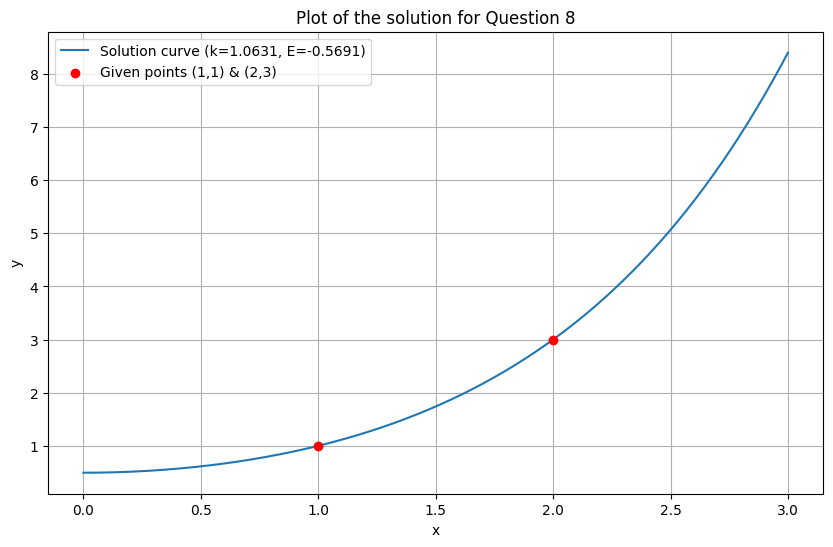

array([ 1.06306099, -0.56912302])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def equation_system(vars):
    k, E = vars
    # We apply the boundary conditions given: (x0,y0) = (1,1) and (x1,y1) = (2,3)
    eq1 = k * np.cosh(1 / k) + E - 1  # Condition at (1,1)
    eq2 = k * np.cosh(2 / k) + E - 3  # Condition at (2,3)
    return [eq1, eq2]

initial_guess = [1, 0]
solution = fsolve(equation_system, initial_guess)

k_value, E_value = solution

def calculate_y(x, k, E):
    return k * np.cosh(x / k) + E

x = np.linspace(0, 3, 400)
y = calculate_y(x, k_value, E_value)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Solution curve (k={k_value:.4f}, E={E_value:.4f})')
plt.scatter([1, 2], [1, 3], color='red', zorder=5, label='Given points (1,1) & (2,3)')
plt.title('Plot of the solution for Question 8')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

solution
